##### <p style="text-align: center;"> ![alt text](utilities/cilss.png)</p>
# <p style="text-align: center;">AGHRYMET RCC-WAS</p>
#### &copy; Mandela HOUNGNIBO 2024 (Find more [here](https://github.com/hmandela))

## Library

In [1]:
from wass2s import *
import importlib
from pathlib import Path
import warnings
import gc
warnings.filterwarnings("ignore")

#### Set forecast working directory

In [6]:
# Set forecast working directory
dir_s2s = "./"

In [7]:
dir_s2s = Path(dir_s2s)
os.makedirs(dir_s2s, exist_ok=True)

## Download Observation and Process 


#### Load Downloader 

In [8]:
# Load WAS_S2S downloader class
downloader = WAS_Download()

In [12]:
# Filter observation names to identify precipitation-related models
variables_obs = [key for key in downloader.AgroObsName().keys() if "PRCP" in key]

# Specify the directory to save downloaded model data
dir_to_save_Obs = f"{dir_s2s}/Observation"

# choose sequence corresponding to seasonal forecast targets (JAS season in this case)
season_obs = ["07", "08", "09"]  # July-August-September forecast period

# Define the observation period (years 1993 to 2016)
year_start = 1991
year_end = 2024

# Set the bounding box for the area of interest (latitude and longitude bounds)
extent_obs = [8, -10, 4, 0]  # [Northern, Western, Southern and Eastern] 

# Specify whether to overwrite existing files when downloading data
force_download = False

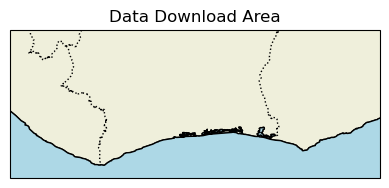

In [13]:
plot_map([extent_obs[1],extent_obs[3],extent_obs[2],extent_obs[0]], title="Data Download Area", fig_size=(4,3))

In [8]:
downloader.WAS_Download_AgroIndicators(
    dir_to_save_Obs,
    variables_obs,
    year_start,
    year_end,
    extent_obs,
    season_obs,
    force_download
)

JAS_2025_ic_5/Observation/Obs_PRCP_1991_2024_JulAugSep.nc already exists. Skipping download.


In [9]:
#### Process predictant
rainfall = prepare_predictand(dir_to_save_Obs, variables_obs, year_start, year_end, season_obs, ds=False, daily=False)
season_str = "".join([calendar.month_abbr[int(month)] for month in season_obs])

#### Process Obs in combining with Seasonal cumulative Ground-Observation

In [14]:
# ## Path to the CPT file
cpt_input_file_path = "./CPT_File.csv"

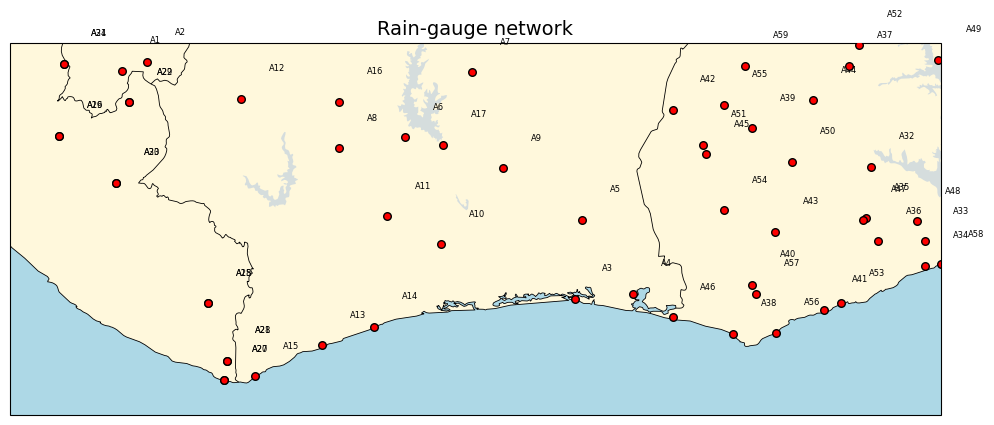

In [15]:
# ## Read CSV
df = pd.read_csv(cpt_input_file_path, na_values=-999.0,  encoding="latin1")
df_filtered = df[(df['STATION'] == 'LAT') | (df['STATION'] == 'LON') | 
                 (pd.to_numeric(df['STATION'], errors='coerce').between(year_start, year_end))]
verify_station_network(df_filtered, extent_obs)

In [12]:
da = prepare_predictand(dir_to_save_Obs, variables_obs, year_start, year_end, season_obs,  ds=False).sel(T=slice(str(year_start),str(year_end)))

In [13]:
# ## Instantiate WAS_Merging class
data_merger = WAS_Merging(df_filtered, da, date_month_day= '08-01')
rainfall__, _ = data_merger.simple_bias_adjustment(do_cross_validation=False)


Year = 1991-08-01T00:00:00.000000000, number in-situ = 523

Year = 1992-08-01T00:00:00.000000000, number in-situ = 511

Year = 1993-08-01T00:00:00.000000000, number in-situ = 521

Year = 1994-08-01T00:00:00.000000000, number in-situ = 522

Year = 1995-08-01T00:00:00.000000000, number in-situ = 526

Year = 1996-08-01T00:00:00.000000000, number in-situ = 527

Year = 1997-08-01T00:00:00.000000000, number in-situ = 525

Year = 1998-08-01T00:00:00.000000000, number in-situ = 527

Year = 1999-08-01T00:00:00.000000000, number in-situ = 530

Year = 2000-08-01T00:00:00.000000000, number in-situ = 528

Year = 2001-08-01T00:00:00.000000000, number in-situ = 520

Year = 2002-08-01T00:00:00.000000000, number in-situ = 527

Year = 2003-08-01T00:00:00.000000000, number in-situ = 527

Year = 2004-08-01T00:00:00.000000000, number in-situ = 522

Year = 2005-08-01T00:00:00.000000000, number in-situ = 522

Year = 2006-08-01T00:00:00.000000000, number in-situ = 525

Year = 2007-08-01T00:00:00.000000000, n

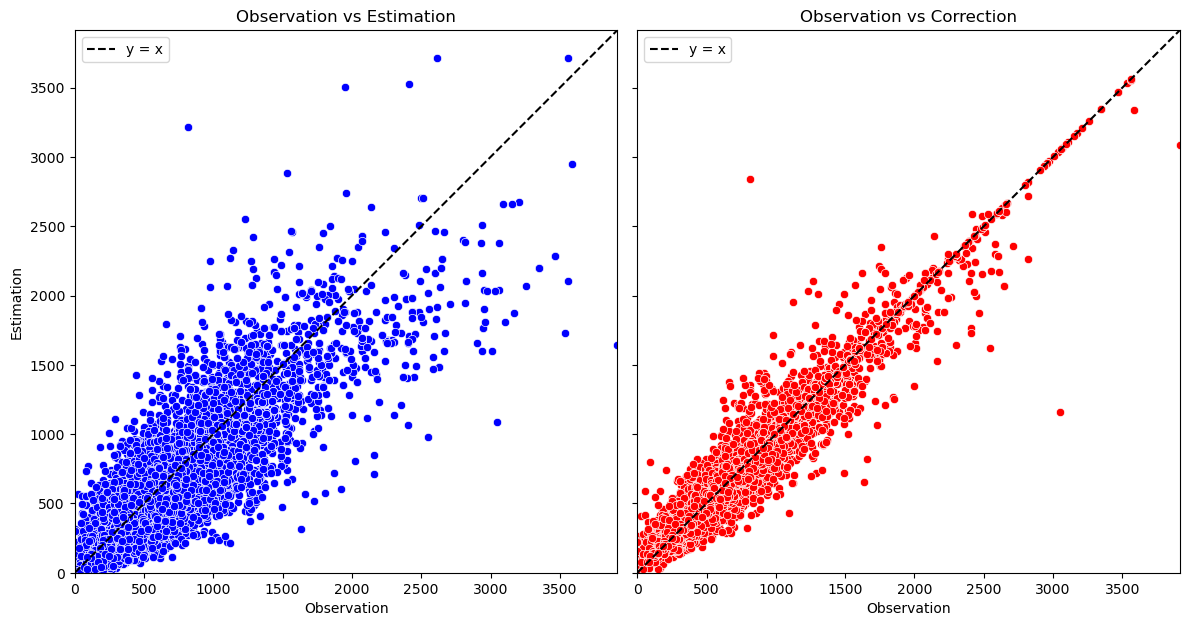

In [14]:
data_merger.plot_merging_comparaison(df_filtered, da, rainfall__)

In [15]:
rainfall = rainfall__

## Find Best parametric distribution representing parameter 

In [2]:
small_rainfall = rainfall.sel(X=slice(-5,-4),Y=slice(1,2))
find_best_distribution_grid(small_rainfall)

Signature: find_best_distribution_grid(rainfall, distribution_map=None)
Docstring:
Determine the best-fitting distribution for rainfall data at each grid cell.

Parameters
----------
rainfall : xarray.DataArray
    Precipitation data with a time dimension 'T' and spatial dimensions 'Y', 'X'.
distribution_map : dict, optional
    Mapping of distribution names to numeric codes. Defaults to:
    {'norm': 1, 'lognorm': 2, 'expon': 3, 'gamma': 4, 'weibull_min': 5}

Returns
-------
xarray.DataArray
    Array with numeric codes for the best-fitting distribution at each grid cell.

Notes
-----
Uses the Fitter library to fit distributions and select the best based on sum-of-squared errors.
File:      ~/Documents/AICCRA_AGRHYMET_2024/My_ML_training/WAS_S2S_/WASS2S/wass2s/utils.py
Type:      function